In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('readingDataSet/Visadataset.csv')

In [3]:
df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [5]:
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [11]:
df['case_status'].value_counts()

case_status
Certified    17018
Denied        8462
Name: count, dtype: int64

In [12]:
df['continent'].value_counts()

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

In [20]:
# how to get how many people from asia got visa certified

cond1 = df['case_status'] == 'Certified'
cond2 = df['continent'] == 'Asia'
combine= cond1 & cond2
len(df[combine])

11012

In [27]:
cond1 = df['case_status'] == 'Certified'
cond2 = df['continent'] == 'Asia'
cond3 = df['requires_job_training']  =='Y'
combine= cond1 & cond2
combine2 = combine & cond3
len(df[combine2])

1169

In [36]:
labels = df['continent'].value_counts().keys()
certified,denied = [],[]
for i in labels:
    cond1 = df['case_status'] == 'Certified'
    cond2 = df['continent'] ==  i
    cond3 = df['case_status'] == 'Denied'
    cert= cond1 & cond2
    den= cond2& cond3
    certified.append(len(df[cert]))
    denied.append(len(df[den]))

cols = df['case_status'].value_counts().keys()
pd.DataFrame(zip(certified,denied),
                 index = labels,
                 columns =cols )

case_status,Certified,Denied
continent,,
Asia,11012,5849
Europe,2957,775
North America,2037,1255
South America,493,359
Africa,397,154
Oceania,122,70


Instead of all the above we have method in pandas called **crosstab**

In [50]:
col1 = df['continent']
col2 = df['case_status']
r1 = pd.crosstab(col1,col2)
r2 = pd.crosstab(col2,col1)

<Axes: xlabel='case_status'>

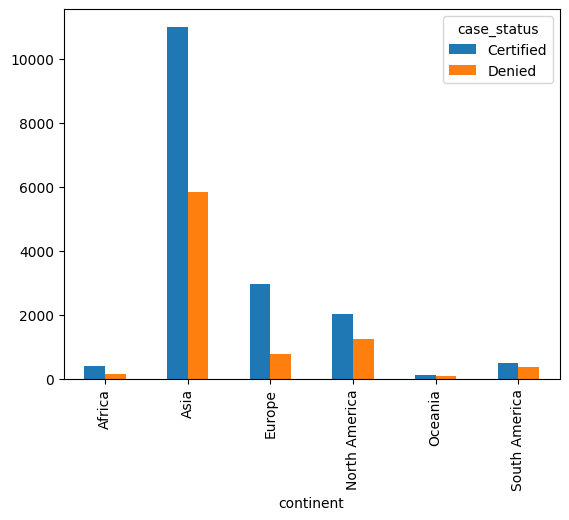

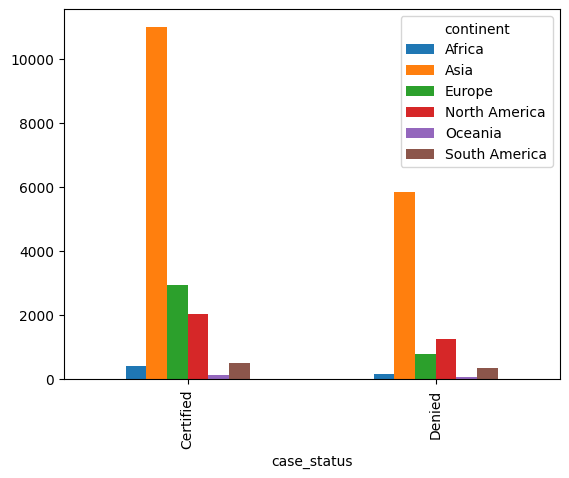

In [51]:
r1.plot(kind='bar')
r2.plot(kind='bar')

     How many certified from asia 


          In that how many are Doctorate 

In [52]:
df['education_of_employee'].value_counts().keys()

Index(['Bachelor's', 'Master's', 'High School', 'Doctorate'], dtype='object', name='education_of_employee')

In [60]:
col1 = df['continent']
col2 = df['case_status']
col3 = df['education_of_employee']
col = [col2,col3]
r1 = pd.crosstab(col1,col)
r1

case_status            Certified                                    Denied  \
education_of_employee Bachelor's Doctorate High School Master's Bachelor's   
continent                                                                    
Africa                        81        43          23      250         62   
Asia                        4407       780         676     5149       2761   
Europe                      1040       788         162      967        259   
North America                641       207         210      979        584   
Oceania                       38        19          19       46         28   
South America                160        75          74      184        173   

case_status                                           
education_of_employee Doctorate High School Master's  
continent                                             
Africa                       11          43       38  
Asia                        143        1614     1331  
Europe                       58         328      130  
North America                51         191      429  
Oceania                       3          17       22  
South America                14          63      109

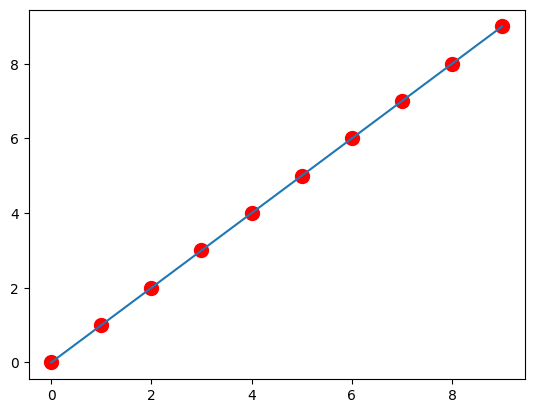

In [84]:
x = [i for i in range(10)]
y = [j for j in range(10)]
plt.scatter(x,y,c='red',s = 100)
plt.plot(x,y)

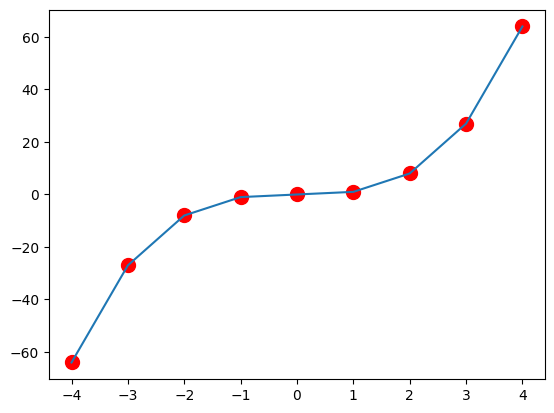

In [86]:
x = [i for i in range(-4,5)]
y = [i*i*i for i in x]
plt.scatter(x,y,c='red',s = 100)
plt.plot(x,y)

In [92]:
num = df.select_dtypes(exclude='object').keys()
num

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

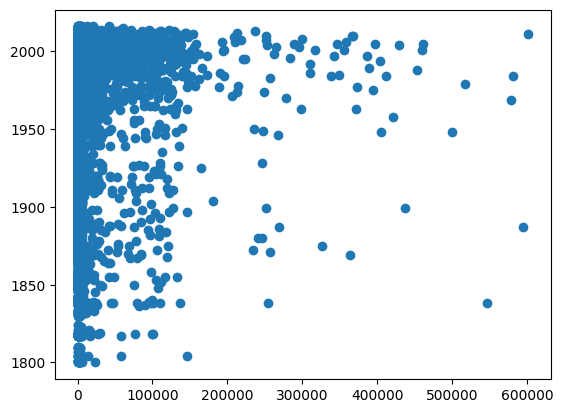

In [ ]:
col1 = df['no_of_employees']
col2 = df['yr_of_estab']
col3 = df['prevailing_wage']
plt.scatter(col1,col2,)

In [107]:
# visa_df = df.corr(numeric_only= True)
df.corr(numeric_only= True)

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


In [102]:
wine_df = pd.read_csv('readingDataSet/winequality_red.csv')

In [108]:
# wine_df.corr(numeric_only= True)

wine_corr = wine_df.corr(numeric_only= True)



Here in above identifying is very difficult so we use seaborn heatmap

<Axes: >

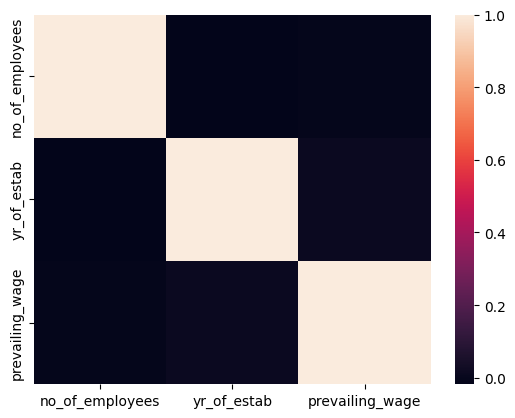

In [106]:
sns.heatmap(visa_df)

In [110]:
wine_df.corr(numeric_only= True)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<Axes: >

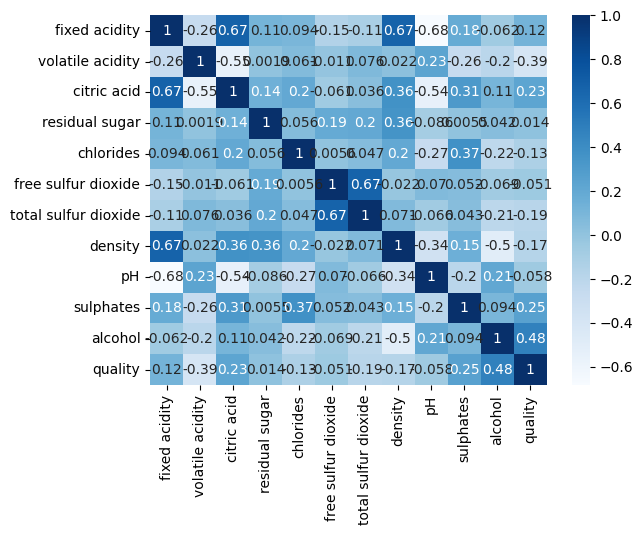

In [121]:

wine_corr = wine_df.corr(numeric_only= True)


plt.Figure(figsize=(10,6))
sns.heatmap(wine_corr,annot=True,cmap='Blues')

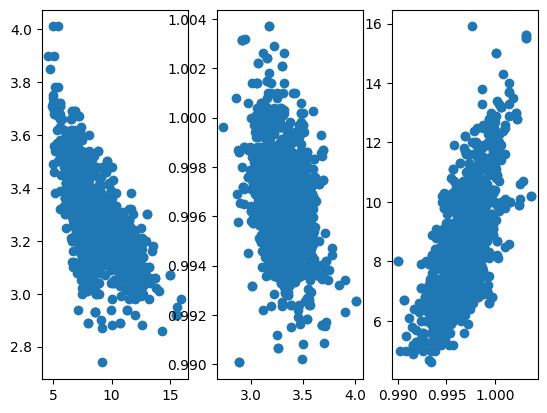

In [130]:

col1 = wine_df['fixed acidity']
col2 = wine_df['pH']
col3 = wine_df['density']
plt.Figure(figsize=(12,8))
plt.subplot(1,3,1).scatter(col1,col2)
plt.subplot(1,3,2).scatter(col2,col3)
plt.subplot(1,3,3).scatter(col3,col1)